In [ ]:
!pip install opendatasets

In [ ]:
!pip install Pillow


In [ ]:
import opendatasets as od
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import torchvision.transforms as transforms
import random

import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os # accessing directory structure
import torchvision.datasets as datasets

from torch.utils.data import  random_split, DataLoader
import torch
import torchvision
import keras



# ***DATASET***

In [ ]:
dataset_link = "https://www.kaggle.com/datasets/subinium/emojiimage-dataset?select=full_emoji.csv"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: carlososmar
Your Kaggle Key: ··········


100%|██████████| 47.6M/47.6M [00:03<00:00, 15.5MB/s]


In [ ]:
import os
import shutil

# Ruta de la carpeta original con las subcarpetas de etiquetas
carpeta_original = "/content/emojiimage-dataset/image"

# Ruta de la carpeta donde deseas crear la nueva estructura
carpeta_destino = "/content/dataset_labels_escogidos"

# Lista de etiquetas que deseas excluir
etiquetas_a_excluir = ["KDDI", "SoftBank", "Gmail", "DoCoMo"]

# Obtén la lista de subcarpetas en la carpeta original
subcarpetas = os.listdir(carpeta_original)

# Itera a través de las subcarpetas y copia solo las que no deseas excluir
for subcarpeta in subcarpetas:
    if subcarpeta not in etiquetas_a_excluir:
        # Ruta completa de la subcarpeta original
        ruta_original = os.path.join(carpeta_original, subcarpeta)

        # Ruta completa de la subcarpeta de destino
        ruta_destino = os.path.join(carpeta_destino, subcarpeta)

        # Copia la subcarpeta a la carpeta de destino
        shutil.copytree(ruta_original, ruta_destino)

print("Carpeta de destino creada con las subcarpetas deseadas.")


Carpeta de destino creada con las subcarpetas deseadas.


In [ ]:
import os
import shutil

# Ruta de la carpeta de origen (donde están las imágenes en diferentes subcarpetas)
carpeta_origen = "/content/dataset_labels_escogidos"

# Ruta de la carpeta de destino (donde quieres que se copien todas las imágenes)
carpeta_destino = "/content/dataset_Todo_en_uno"

# Crear la carpeta de destino si no existe
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

# Itera sobre las subcarpetas en la carpeta de origen
for root, _, files in os.walk(carpeta_origen):
    for archivo in files:
        # Construye la ruta completa del archivo de origen
        ruta_origen = os.path.join(root, archivo)

        # Construye la ruta completa del archivo de destino en la carpeta de destino
        ruta_destino = os.path.join(carpeta_destino, archivo)

        # Copia el archivo de origen al destino
        shutil.copy2(ruta_origen, ruta_destino)

print("Imágenes copiadas exitosamente a la carpeta de destino:", carpeta_destino)


Imágenes copiadas exitosamente a la carpeta de destino: /content/dataset_Todo_en_uno


In [ ]:
'''crea la columna image'''
df = pd.read_csv("/content/emojiimage-dataset/full_emoji.csv", error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['#']) + ".png", axis=1)
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

<ipython-input-7-a189bfa3a93c>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/emojiimage-dataset/full_emoji.csv", error_bad_lines=False)


,#,emoji,unicode,name,Apple,Google,Facebook,Windows,Twitter,JoyPixels,Samsung,Gmail,SoftBank,DoCoMo,KDDI,image
0,1775,🇹🇦,U+1F1F9 U+1F1E6,flag: Tristan da Cunha,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",NaN,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",NaN,NaN,NaN,NaN,1775.png
1,142,🤍,U+1F90D,white heart,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",NaN,NaN,NaN,NaN,142.png
2,803,🏚,U+1F3DA,derelict house,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",NaN,NaN,NaN,NaN,803.png
3,1467,3️⃣,U+0033 U+FE0F U+20E3,keycap: 3,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDwAPALMAAAFa+lKV...","data:image/png;base64,R0lGODlhDwAPAKIAAJMABv8A...","data:image/png;base64,R0lGODlhDAAMAJECAAAAAP//...","data:image/png;base64,R0lGODlhDgAPAKIFAAAA////...",1467.png
4,370,🧞,U+1F9DE,genie,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",NaN,NaN,NaN,NaN,370.png
5,1786,🇹🇴,U+1F1F9 U+1F1F4,flag: Tonga,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",NaN,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",NaN,NaN,NaN,NaN,1786.png
6,1052,🔮,U+1F52E,crystal ball,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDwAPALMPAKDa/29w...",NaN,NaN,"data:image/png;base64,R0lGODlhDgAPALMJAP///8z/...",1052.png
7,609,🐙,U+1F419,octopus,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDwAPALMPAJwBAf+H...","data:image/png;base64,R0lGODlhDwAPAKIAAAAAAP//...",NaN,"data:image/png;base64,R0lGODlhDgAPALMJAGZmZv/M...",609.png
8,292,👩‍💼,U+1F469 U+200D U+1F4BC,woman office worker,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,i

In [ ]:
import pandas as pd

# Lee el archivo CSV


# Convierte la columna 'edad' de int a str
df['#'] = df['#'].astype(str)

# Guarda el DataFrame actualizado en un nuevo archivo CSV
# df.to_csv('datos_actualizados.csv', index=False)



In [ ]:
'''CREAR CARPETAS CON EL NOMBRE DEL LABEL Y DE CONTENIDO SUS REPECTIVAS IMAGENES'''

import pandas as pd
import os
import shutil

data = df


labels = data['#'].unique()


dataset_folder = 'dataset'
os.makedirs(dataset_folder, exist_ok=True)


for label in labels:
    label_folder = os.path.join(dataset_folder, label)
    os.makedirs(label_folder, exist_ok=True)


for index, row in data.iterrows():
    image_name = row['image']
    label = row['#']
    source_image_path = os.path.join('/content/dataset_Todo_en_uno', image_name)
    destination_folder = os.path.join(dataset_folder, label)
    destination_image_path = os.path.join(destination_folder, image_name)

    try:
        # Intenta copiar la imagen
        shutil.copy(source_image_path, destination_image_path)

    except FileNotFoundError:

        print(f"La imagen {image_name} no existe en la ubicación de origen.")
    except Exception as e:

        print(f"Error al copiar la imagen {image_name}: {str(e)}")

print("Estructura de carpetas creada exitosamente.")

Estructura de carpetas creada exitosamente.


In [ ]:
import os
import shutil

# Ruta de la carpeta original
carpeta_original = "/content/dataset"

# Ruta de la carpeta nueva estructura
carpeta_destino = "/content/dataset_final"

# Lista de etiquetas
etiquetas_a_incluir = []
for i in range(1,97):
  dato = f"{i}"
  etiquetas_a_incluir.append(dato)

# Crea la carpeta de destino si no existe
os.makedirs(carpeta_destino, exist_ok=True)

# Itera a través de las etiquetas que deseas incluir
for etiqueta in etiquetas_a_incluir:
    # Ruta completa de la subcarpeta original
    ruta_original = os.path.join(carpeta_original, etiqueta)

    # Ruta completa de la subcarpeta de destino
    ruta_destino = os.path.join(carpeta_destino, etiqueta)

    # Copia la subcarpeta a la carpeta de destino
    shutil.copytree(ruta_original, ruta_destino)

print("Carpeta de destino creada con las subcarpetas deseadas.")


Carpeta de destino creada con las subcarpetas deseadas.


In [ ]:
'''CREAMOS DATOS SINTETICOS'''
import os
import cv2
import numpy as np
from PIL import Image, ImageEnhance
from pathlib import Path

# Directorio raíz del dataset
dataset_dir = '/content/dataset_final'

# Lista de transformaciones que se aplicará
transformations = [
    ("original", lambda img: img),  # Mantiene la imagen original
    ("rotacion", lambda img: cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)),  # Rotación 90 grados
    ("espejo_horizontal", lambda img: cv2.flip(img, 1)),  # Espejo horizontal
    ("brillo", lambda img: ImageEnhance.Brightness(Image.fromarray(img)).enhance(1.5)),  # Aumentar brillo
    ("contraste", lambda img: ImageEnhance.Contrast(Image.fromarray(img)).enhance(1.5)),  # Aumentar contraste
]

# Número de copias por cada transformación
num_copies_per_transformation = 5

# Itera a través de las carpetas de labels
for label_folder in os.listdir(dataset_dir):
    label_folder_path = os.path.join(dataset_dir, label_folder)

    if os.path.isdir(label_folder_path):
        # print(f"Aumentando datos para la etiqueta: {label_folder}")

        # Itera a través de las imágenes en la carpeta de la etiqueta
        for image_file in os.listdir(label_folder_path):
            image_path = os.path.join(label_folder_path, image_file)

            # Carga la imagen
            img = cv2.imread(image_path)

            # Aplica las transformaciones y guarda las imágenes aumentadas
            for transform_name, transform_func in transformations:
                for i in range(num_copies_per_transformation):
                    transformed_img = transform_func(img)

                    # Convierte la imagen aumentada a formato numpy array
                    transformed_img = np.array(transformed_img)

                    # Genera un nombre único para la imagen aumentada
                    transformed_image_name = f"{transform_name}_{i}_{image_file}"
                    transformed_image_path = os.path.join(label_folder_path, transformed_image_name)

                    # Guarda la imagen aumentada
                    cv2.imwrite(transformed_image_path, transformed_img)

print("Aumentación de datos completa.")



Aumentación de datos completa.


In [ ]:
'''verificar la cantidad de elementos de cada carpeta'''
import os
from collections import Counter

# Ruta al directorio raíz que contiene las carpetas con archivos
root_dir = "/content/dataset_final"

# Obtener una lista de todas las carpetas dentro del directorio raíz
subdirectories = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

# Recorre cada carpeta y cuenta las extensiones de archivo únicas
for folder_name in subdirectories:
    folder_path = os.path.join(root_dir, folder_name)

    # Obtén una lista de todos los archivos en la carpeta
    file_list = os.listdir(folder_path)

    # Extrae las extensiones de archivo de la lista de archivos
    file_extensions = [os.path.splitext(file)[1] for file in file_list]

    # Usa Counter para contar las extensiones de archivo únicas
    extension_counter = Counter(file_extensions)

    # Imprime las extensiones de archivo y sus recuentos
    print(f"En la carpeta '{folder_name}':")
    for extension, count in extension_counter.items():
        print(f"   Tipo de archivo: {extension}, Cantidad: {count}")
    print()

En la carpeta '30':
   Tipo de archivo: .png, Cantidad: 6

En la carpeta '16':
   Tipo de archivo: .png, Cantidad: 6

En la carpeta '93':
   Tipo de archivo: .png, Cantidad: 6

En la carpeta '5':
   Tipo de archivo: .png, Cantidad: 6

En la carpeta '55':
   Tipo de archivo: .png, Cantidad: 6

En la carpeta '48':
   Tipo de archivo: .png, Cantidad: 6

En la carpeta '72':
   Tipo de archivo: .png, Cantidad: 6

En la carpeta '68':
   Tipo de archivo: .png, Cantidad: 6

En la carpeta '33':
   Tipo de archivo: .png, Cantidad: 6

En la carpeta '88':
   Tipo de archivo: .png, Cantidad: 6

En la carpeta '77':
   Tipo de archivo: .png, Cantidad: 6

En la carpeta '52':
   Tipo de archivo: .png, Cantidad: 6

En la carpeta '73':
   Tipo de archivo: .png, Cantidad: 6

En la carpeta '8':
   Tipo de archivo: .png, Cantidad: 6

En la carpeta '32':
   Tipo de archivo: .png, Cantidad: 6

En la carpeta '41':
   Tipo de archivo: .png, Cantidad: 6

En la carpeta '90':
   Tipo de archivo: .png, Cantidad: 6


In [ ]:
dataset_dir = "/content/dataset_final"
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((60,60)),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Lambda(lambda x: (x * 2) - 1)
])

In [ ]:
dataset = datasets.ImageFolder(root= dataset_dir, transform = transform)

In [ ]:
# Selecciona una muestra de imagen (por ejemplo, la primera imagen)
sample_img, _ = dataset[0]

# Muestra las dimensiones de la muestra de imagen
print("Dimensiones de la muestra de imagen:", sample_img.shape)

Dimensiones de la muestra de imagen: torch.Size([3, 60, 60])


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# dataset.classes

In [ ]:
classes = etiquetas_a_incluir

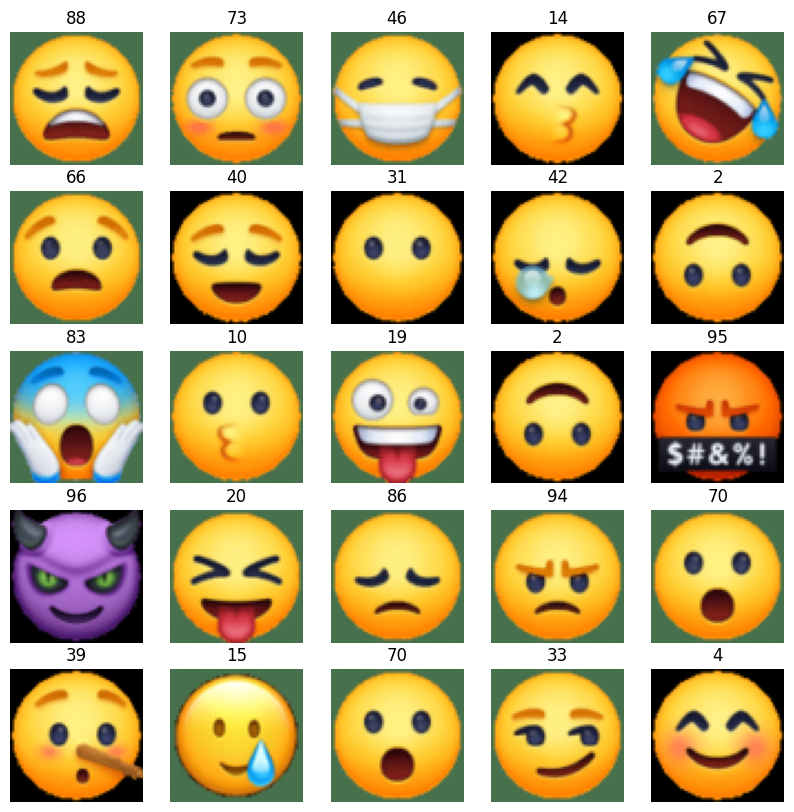

In [ ]:
fig, axs = plt.subplots(5,5, figsize=(10,10))
for _ax in axs:
    for ax in _ax:
        ix = random.randint(0, len(dataset)-1)
        img, lab = dataset[ix]
        ax.imshow(((img+1)/2).permute(1,2,0))
        ax.axis('off')
        ax.set_title(classes[lab])
plt.show()

In [ ]:
# dimenciones de un dato
indice = 0
imagen, etiqueta = dataset[indice]

dimensiones = imagen.shape
print("Dimensiones de la imagen:", dimensiones)

Dimensiones de la imagen: torch.Size([3, 60, 60])


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import numpy as np

class Dataset(torch.utils.data.Dataset):
  def __init__(self, trainset):
    self.imgs = torch.tensor([np.array(i[0]).flatten() / 255. for i in trainset], dtype=torch.float, device=device)
    self.imgs = self.imgs * 2. - 1.
    self.labels = torch.tensor([i[1] for i in trainset], dtype=torch.long, device=device)

  def __len__(self):
    return len(self.imgs)

  def __getitem__(self, ix):
    return self.imgs[ix], self.labels[ix]

train = Dataset(dataset)
len(train)

<ipython-input-23-f58991023eb0>:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  self.imgs = torch.tensor([np.array(i[0]).flatten() / 255. for i in trainset], dtype=torch.float, device=device)


576

In [ ]:
dataloader = DataLoader(train, batch_size=32, shuffle= True)
imgs, labels = next(iter(dataloader))
# imgs.shape, labels.shape
classes = dataset.classes

In [ ]:
from fastprogress import master_bar, progress_bar
import torch.nn as nn
def fit(g, d, dataloader, epochs=30, crit=None):
  g.to(device)
  d.to(device)
  g_optimizer = torch.optim.AdamW(g.parameters(), lr=3e-4)
  d_optimizer = torch.optim.AdamW(d.parameters(), lr=3e-4)
  crit = nn.BCEWithLogitsLoss() if crit == None else crit
  g_loss, d_loss = [], []
  mb = master_bar(range(1, epochs+1))
  hist = {'g_loss': [], 'd_loss': []}
  for epoch in mb:

    for X, y in progress_bar(dataloader, parent=mb):
      #X, y = X.to(device), y.to(device)
      # entrenamos el discriminador
      g.eval()
      d.train()
      #   generamos un batch de imágenes falsas
      noise = torch.randn((X.size(0), g.input_size)).to(device)
      genenerated_images = g(noise)
      #   input del discrminator
      # Verifica las dimensiones de genenerated_images y X
      # print(f'genenerated_images shape: {genenerated_images.shape}')
      # print(f'X shape: {X.shape}')
      X = X.view(X.size(0), 3, 60, 60)  # Cambia 1 a la cantidad de canales si es en color
      d_input = torch.cat([genenerated_images, X])

      # d_input = torch.cat([genenerated_images, X.view(X.size(0), -1)])
      d_gt = torch.cat([torch.zeros(X.size(0)), torch.ones(X.size(0))]).view(-1,1).to(device)
      #   optimización
      d_optimizer.zero_grad()
      d_output = d(d_input)
      d_l = crit(d_output, d_gt)
      d_l.backward()
      d_optimizer.step()
      d_loss.append(d_l.item())
      # entrenamos el generador
      g.train()
      d.eval()
      #   generamos un batch de imágenes falsas
      noise = torch.randn((X.size(0), g.input_size)).to(device)
      genenerated_images = g(noise)
      #   salidas del discriminador
      d_output = d(genenerated_images)
      #   gorund truth para el generator
      g_gt = torch.ones(X.size(0)).view(-1,1).to(device)
      #   optimización
      g_optimizer.zero_grad()
      g_l = crit(d_output, g_gt)
      g_l.backward()
      g_optimizer.step()
      g_loss.append(g_l.item())
      # logs
      mb.child.comment = f'g_loss {np.mean(g_loss):.5f} d_loss {np.mean(d_loss):.5f}'
    mb.write(f'Epoch {epoch}/{epochs} g_loss {np.mean(g_loss):.5f} d_loss {np.mean(d_loss):.5f}')
    hist['g_loss'].append(np.mean(g_loss))
    hist['d_loss'].append(np.mean(d_loss))
  return hist

In [ ]:
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self, input_channels=3, output_size=1):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(input_channels, 64, 4, stride=2, padding=1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True)
        )
        self.out = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 15 * 15, output_size),
            nn.Sigmoid() if output_size == 1 else nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.main(x)
        x = self.out(x)
        return x


In [ ]:
discriminator = Discriminator()
output = discriminator(torch.randn(64, 3,60,60))
output.shape

torch.Size([64, 1])

In [ ]:


class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_size = 100
        self.inp = nn.Sequential(
            nn.Linear(self.input_size, 128 * 15 * 15),
            nn.BatchNorm1d(128 * 15 * 15),
        )
        self.main = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1, bias=False),  # Cambiar a 3 canales (RGB)
            nn.Tanh()
        )

    def forward(self, x):
        x = self.inp(x)
        x = x.view(-1, 128, 15, 15)  # Cambiar a 15x15
        x = self.main(x)
        x = x.view(x.size(0), 3, 60, 60)  # Cambiar a 3 canales (RGB) y 60x60
        return x


In [ ]:


generator = Generator()
output = generator(torch.randn(64, 100))
output.shape

torch.Size([64, 3, 60, 60])

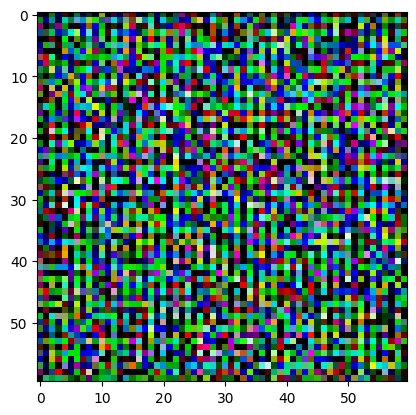

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que 'output' contiene el tensor de imágenes con dimensión [64, 3, 60, 60]
image_to_show = output[0].permute(1, 2, 0).cpu().detach().numpy()
plt.imshow(image_to_show)
plt.show()


In [ ]:
hist = fit(generator, discriminator, dataloader, crit=torch.nn.BCELoss(), epochs=30)

In [ ]:
# hist = fit2(generator3, discriminator3, dataloader, epochs=30)

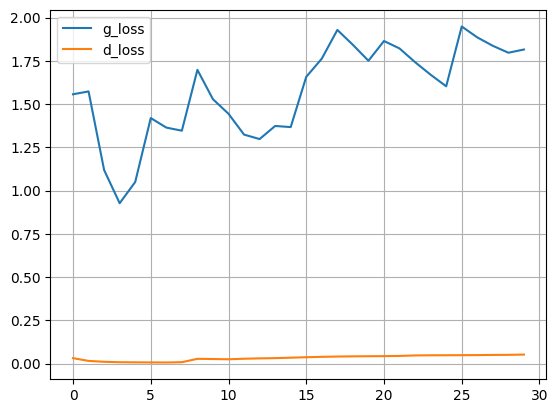

In [ ]:
df = pd.DataFrame(hist)
df.plot(grid=True)
plt.show()

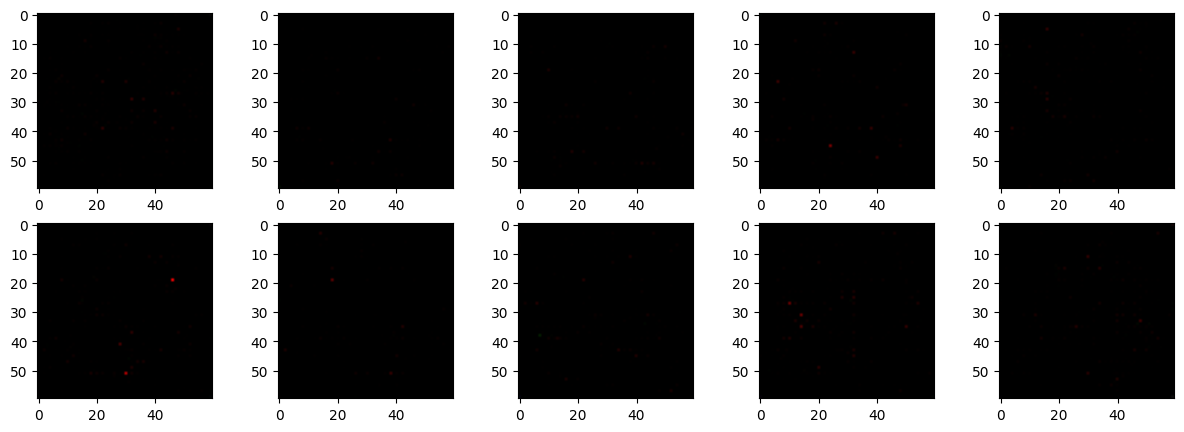

In [ ]:
generator.eval()
with torch.no_grad():
  noise = torch.randn((10, generator.input_size)).to(device)
  generated_images = generator(noise)
  fig, axs = plt.subplots(2,5,figsize=(15,5))
  i = 0
  for ax in axs:
    for _ax in ax:
      img = (generated_images[i].view(3,60,60).permute(1,2,0).cpu())*0.5+0.5
      _ax.imshow(img)
      i+=1
  plt.show()